In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Kindle_review_preprocessed')
df.head(2)

,Unnamed: 0,reviewText,rating
0,0,jace rankin may short he nothing mess man haul...,0
1,1,great short read didnt want put read one sitti...,1


In [3]:
#Creating Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['reviewText'],df['rating'],test_size=0.20,random_state=42)

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train).toarray()  #Using TF-IDF to transform sentences into vectors
X_test_tfidf=tfidf.transform(X_test).toarray()

In [5]:
from sklearn.naive_bayes import GaussianNB
nb_model_tfidf=GaussianNB().fit(X_train_tfidf,y_train) #Applying Gaussian Naive Bayes Classifier

In [6]:
y_pred=nb_model_tfidf.predict(X_test_tfidf)

In [7]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve
print("Accuracy Score=",accuracy_score(y_pred,y_test))
print("classification_report=",classification_report(y_pred,y_test))

Accuracy Score= 0.6266666666666667
classification_report=               precision    recall  f1-score   support

           0       0.68      0.61      0.64      1322
           1       0.58      0.65      0.61      1078

    accuracy                           0.63      2400
   macro avg       0.63      0.63      0.63      2400
weighted avg       0.63      0.63      0.63      2400



In [8]:
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27596\3961448526.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


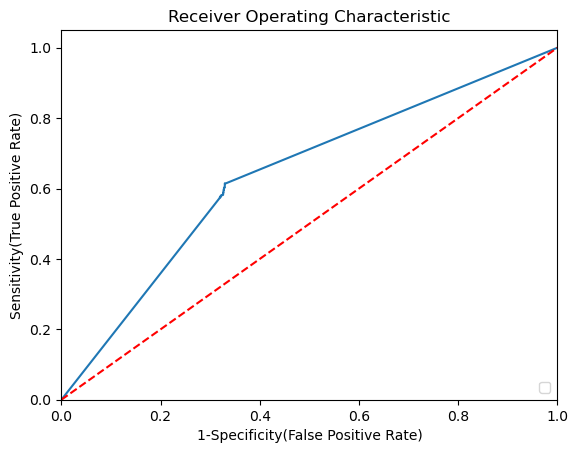

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, nb_model_tfidf.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

In [ ]:
#The accuracy increases as compared to Bag of Words but is still not quite satisfactory